In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
file = open('data.pickle', 'rb')
data_dict = pickle.load(file)
data = data_dict['data']
labels = data_dict['labels']

In [3]:
data.shape
X = data / 255.0

In [4]:
labels.shape

(106,)

0


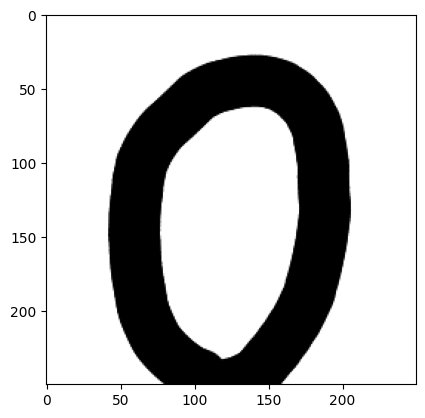

In [5]:
INDEX = 44
plt.figure()
plt.imshow(X[INDEX])
print(labels[INDEX])
plt.show()

<BarContainer object of 10 artists>

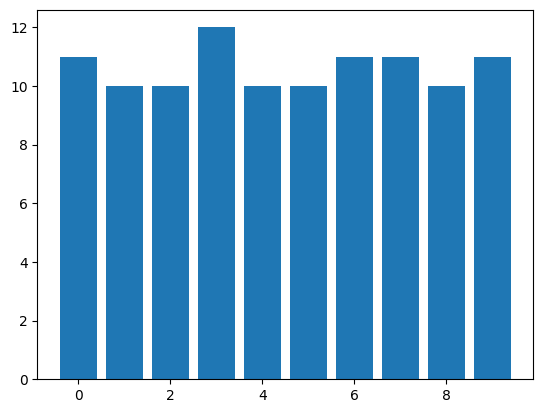

In [6]:
val_count = Counter(labels)

values = list(val_count.keys())
counts = list(val_count.values())


plt.bar(values, counts)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.losses import categorical_crossentropy

2023-08-23 15:23:41.827869: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-23 15:23:41.878015: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-23 15:23:41.879146: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-23 15:23:43.473127: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation=relu, input_shape=(250, 250, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation=relu))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3),activation=relu))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation=relu))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.4))
model.add(Dense(10, activation=softmax))

model.summary()

2023-08-23 15:23:45.045003: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88604672 exceeds 10% of free system memory.
2023-08-23 15:23:45.100537: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88604672 exceeds 10% of free system memory.
2023-08-23 15:23:45.139242: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88604672 exceeds 10% of free system memory.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 29, 29, 128)       0

In [9]:
model.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=[Accuracy()])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=labels)

In [14]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30


2023-08-23 15:24:20.470939: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 63000000 exceeds 10% of free system memory.
2023-08-23 15:24:20.840407: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88604672 exceeds 10% of free system memory.


3/3 [==============================] - 8s 2s/step - loss: 8.0359 - accuracy: 0.0000e+00
Epoch 2/30
3/3 [==============================] - 7s 2s/step - loss: 2.0015 - accuracy: 0.0000e+00
Epoch 3/30
3/3 [==============================] - 7s 2s/step - loss: 1.4002 - accuracy: 0.0000e+00
Epoch 4/30
3/3 [==============================] - 7s 2s/step - loss: 0.5486 - accuracy: 0.0000e+00
Epoch 5/30
3/3 [==============================] - 8s 2s/step - loss: 0.1940 - accuracy: 0.0000e+00
Epoch 6/30
3/3 [==============================] - 7s 2s/step - loss: 0.0835 - accuracy: 0.0000e+00
Epoch 7/30
3/3 [==============================] - 8s 2s/step - loss: 0.0411 - accuracy: 0.0000e+00
Epoch 8/30
3/3 [==============================] - 8s 2s/step - loss: 0.0274 - accuracy: 0.0012
Epoch 9/30
3/3 [==============================] - 8s 3s/step - loss: 0.0101 - accuracy: 0.0024
Epoch 10/30
3/3 [==============================] - 9s 3s/step - loss: 0.0115 - accuracy: 0.0012
Epoch 11/30
3/3 [===============

In [11]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(labels, num_classes=10)

In [81]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 378ms/step


In [17]:
y_pred_classes = y_pred.argmax(axis=1)

In [18]:
y_pred_classes

array([4, 6, 0, 0, 9, 2, 8, 6, 7, 5, 2, 2, 5, 1, 9, 1, 9, 7, 3, 3, 5, 8])

In [19]:
y_test

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [20]:
y_test_classes = y_test.argmax(axis=1)

In [21]:
y_test_classes

array([4, 6, 0, 0, 9, 2, 8, 6, 7, 5, 3, 2, 4, 1, 9, 1, 9, 7, 3, 3, 5, 8])

In [22]:
print(accuracy_score(y_pred_classes, y_test_classes))

0.9090909090909091


In [23]:
from tensorflow.keras.preprocessing import image
image_path = './test.png'
x = image.load_img(image_path)
x_array = image.img_to_array(x)
input = x_array / 255.0
input.shape


(250, 250, 3)

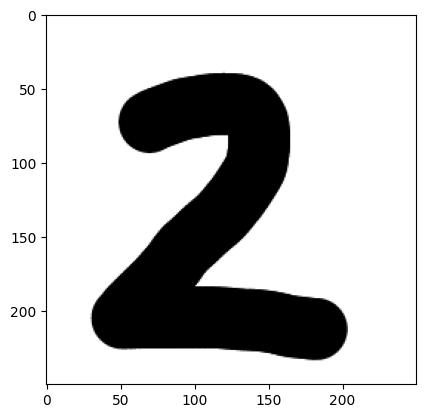

In [24]:
plt.imshow(input)

In [25]:
prediction = model.predict(np.asarray([input]))

1/1 [==============================] - 0s 40ms/step


In [26]:
print(np.argmax(prediction))

2
